In [1]:
%matplotlib inline
import galsim 
import lsst.afw.geom as afwGeom
from lsst.sims.photUtils import matchStar
import numpy as np
from look import look
from generate_sim_catalog import cat_image
from fast_dft import fast_dft

In [2]:
try:
    # Only read in the SEDs if sed_list has not yet been defined.
    # This means that if you set sed_list=None that will be used!
    sed_list
except NameError:
    matchStarObj=matchStar()
    sed_list = matchStarObj.loadKuruczSEDs()

seed = 5
dimension = 512 # number of pixels on a side of the simulation
pad_image = 1.5 # 
sky_noise = 0.0
instrument_noise = 0.0
photon_noise = False
n_star = 1000
pixel_scale = 0.25 # arcsec / pixel
band_name = 'u'  # vaild options are 'u', 'g', 'r', 'i', 'z', or 'y'
hottest_star='B' # vaild options are None (defaults to 'A') or any stellar type OBAFGKM hotter than coolest star
coolest_star='M' # vaild options are None (defaults to 'M') or any stellar type OBAFGKM cooler than hottest star
wavelength_step = 3 # wavelength bin size, in nm
photons_per_adu = 1e4
gsp = galsim.GSParams(folding_threshold=1.0/(dimension))
psf = galsim.Kolmogorov(fwhm=1.0, flux=photons_per_adu)
bbox = afwGeom.Box2I(afwGeom.PointI(0,0), afwGeom.ExtentI(dimension, dimension))

ref_elevation = 85.0 # in degrees
ref_azimuth = 0.0 # in degrees
ref_image=cat_image(seed=seed, bbox=bbox, psf=psf,n_star=n_star, sky_noise=sky_noise, photon_noise=photon_noise,
                     instrument_noise=instrument_noise, pixel_scale=pixel_scale, dcr_flag=True,
                     elevation=ref_elevation, azimuth=ref_azimuth, band_name=band_name, wavelength_step=wavelength_step,
                     hottest_star=hottest_star, coolest_star=coolest_star,sed_list=sed_list, pad_image=pad_image)

obs_elevation = 70.0 # in degrees
obs_azimuth = 20.0 # in degrees
obs_image=cat_image(seed=seed, bbox=bbox, psf=psf,n_star=n_star, sky_noise=sky_noise, photon_noise=photon_noise,
                     instrument_noise=instrument_noise, pixel_scale=pixel_scale, dcr_flag=True,
                     elevation=obs_elevation, azimuth=obs_azimuth, band_name=band_name, wavelength_step=wavelength_step,
                     hottest_star=hottest_star, coolest_star=coolest_star,sed_list=sed_list, pad_image=pad_image)

Loading 0 of 4885: Kurucz SEDs
Loading 100 of 4885: Kurucz SEDs
Loading 200 of 4885: Kurucz SEDs
Loading 300 of 4885: Kurucz SEDs
Loading 400 of 4885: Kurucz SEDs
Loading 500 of 4885: Kurucz SEDs
Loading 600 of 4885: Kurucz SEDs
Loading 700 of 4885: Kurucz SEDs
Loading 800 of 4885: Kurucz SEDs
Loading 900 of 4885: Kurucz SEDs
Loading 1000 of 4885: Kurucz SEDs
Loading 1100 of 4885: Kurucz SEDs
Loading 1200 of 4885: Kurucz SEDs
Loading 1300 of 4885: Kurucz SEDs
Loading 1400 of 4885: Kurucz SEDs
Loading 1500 of 4885: Kurucz SEDs
Loading 1600 of 4885: Kurucz SEDs
Loading 1700 of 4885: Kurucz SEDs
Loading 1800 of 4885: Kurucz SEDs
Loading 1900 of 4885: Kurucz SEDs
Loading 2000 of 4885: Kurucz SEDs
Loading 2100 of 4885: Kurucz SEDs
Loading 2200 of 4885: Kurucz SEDs
Loading 2300 of 4885: Kurucz SEDs
Loading 2400 of 4885: Kurucz SEDs
Loading 2500 of 4885: Kurucz SEDs
Loading 2600 of 4885: Kurucz SEDs
Loading 2700 of 4885: Kurucz SEDs
Loading 2800 of 4885: Kurucz SEDs
Loading 2900 of 4885: Kuru

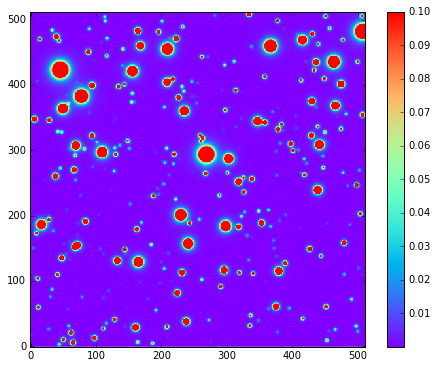

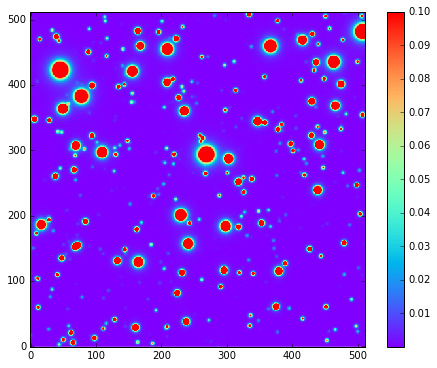

('Sum of reference image: ', 19820.461467234578)
('Sum of DCR image: ', 19822.578485853657)
('Difference: ', 0.010680405042521969, 'percent')


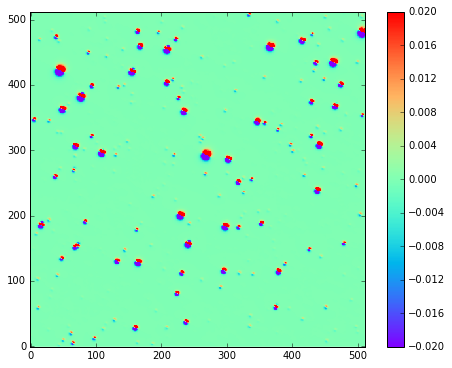

In [3]:
look(ref_image, range=[0.0,.1])
look(obs_image, range=[0.0,.1])
print("Sum of reference image: ", np.sum(ref_image))
print("Sum of DCR image: ", np.sum(obs_image))
obs_sum = np.sum(np.abs(obs_image))
ref_sum = np.sum(np.abs(ref_image))
diff = 2 * np.abs(obs_sum - ref_sum)/(obs_sum + ref_sum)
print("Difference: ", 100 * diff, "percent")
look(ref_image - obs_image, range=[-0.02, 0.02])